In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
df=pd.read_csv('BrentOilPrices.csv')

In [3]:
df.shape

(8360, 2)

In [4]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values(by=['Date'])
df.index=df['Date']
df=df.drop(['Date'],axis=1)
df=df[6000:]

In [5]:
df.head()

,Price
Date,
2010-12-29,93.52
2010-12-30,92.50
2010-12-31,93.23
2011-01-03,95.82
2011-01-04,93.52


In [6]:
df.tail()

,Price
Date,
2020-04-15,19.80
2020-04-16,18.69
2020-04-17,19.75
2020-04-20,17.36
2020-04-21,9.12


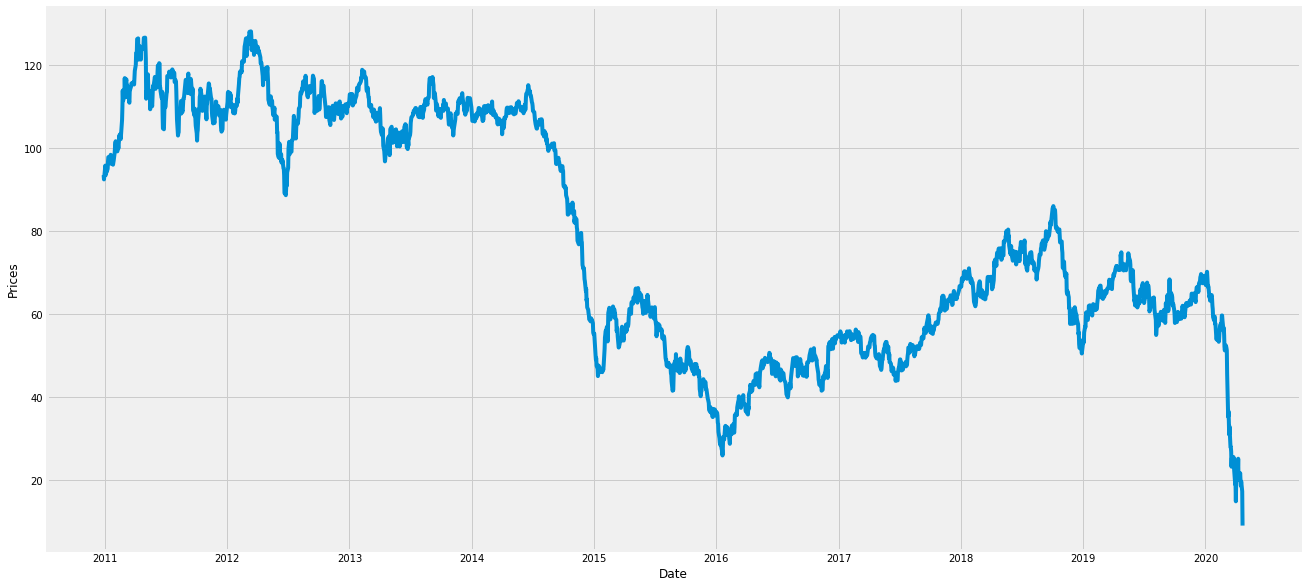

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Prices')

plt.show()

In [8]:
sc=MinMaxScaler(feature_range=(0,1))
df=sc.fit_transform(df)

In [9]:
# We split the data into training and testing sets
# split into train and test sets
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df[0:train_size, :], df[train_size:len(df), :]

In [10]:
def create_dataset( dataset, look_back ):
    dataX, dataY =[],[]
    for i in range( len(dataset) - look_back - 1 ):
        a = dataset[ i:( i+look_back ), 0 ]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [11]:
# Reshape into X=t,Y=t+1
look_back=90
xtrain,ytrain=create_dataset(train, look_back)
xtest,ytest=create_dataset(test, look_back)
xtrain=np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))
xtest=np.reshape(xtest, (xtest.shape[0],xtest.shape[1],1))

In [12]:
print(train)

[[0.70912452]
 [0.70055453]
 [0.70668795]
 ...
 [0.55158797]
 [0.52848261]
 [0.55242816]]


In [13]:
model=Sequential()
model.add(LSTM(units=60,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss="mean_squared_error")
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 60)            14880     
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60)                29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61        
Total params: 43,981
Trainable params: 43,981
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(xtrain,ytrain,epochs=200,batch_size=50,validation_data=(xtest,ytest),verbose=1)


Train on 1797 samples, validate on 381 samples
Epoch 1/200
1797/1797 [==============================] - 19s 11ms/step - loss: 0.0494 - val_loss: 0.0034
Epoch 2/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0059 - val_loss: 0.0016
Epoch 3/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 4/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 5/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0040 - val_loss: 0.0013
Epoch 6/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 7/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 8/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 9/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 10/200
179

Epoch 77/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0013 - val_loss: 6.7562e-04
Epoch 78/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0012 - val_loss: 4.6185e-04
Epoch 79/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0015 - val_loss: 9.6163e-04
Epoch 80/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0011 - val_loss: 4.7124e-04
Epoch 81/200
1797/1797 [==============================] - 14s 8ms/step - loss: 0.0012 - val_loss: 4.6091e-04
Epoch 82/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0012 - val_loss: 4.5817e-04
Epoch 83/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0012 - val_loss: 4.4619e-04
Epoch 84/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0013 - val_loss: 4.6474e-04
Epoch 85/200
1797/1797 [==============================] - 15s 8ms/step - loss: 0.0014 - val_loss: 5.8915e-04
Epoch 86/200
1797/1

Epoch 150/200
1797/1797 [==============================] - 15s 9ms/step - loss: 6.0140e-04 - val_loss: 3.0569e-04
Epoch 151/200
1797/1797 [==============================] - 15s 8ms/step - loss: 5.9056e-04 - val_loss: 3.0820e-04
Epoch 152/200
1797/1797 [==============================] - 15s 8ms/step - loss: 5.7993e-04 - val_loss: 3.5980e-04
Epoch 153/200
1797/1797 [==============================] - 15s 8ms/step - loss: 6.3586e-04 - val_loss: 4.0737e-04
Epoch 154/200
1797/1797 [==============================] - 15s 8ms/step - loss: 6.4243e-04 - val_loss: 3.1245e-04
Epoch 155/200
1797/1797 [==============================] - 15s 8ms/step - loss: 6.8251e-04 - val_loss: 3.3093e-04
Epoch 156/200
1797/1797 [==============================] - 15s 8ms/step - loss: 6.3089e-04 - val_loss: 2.9901e-04
Epoch 157/200
1797/1797 [==============================] - 15s 8ms/step - loss: 6.5709e-04 - val_loss: 2.9600e-04
Epoch 158/200
1797/1797 [==============================] - 15s 8ms/step - loss: 5.2929e-

In [15]:
prediction=model.predict(xtest)

In [16]:
prediction=sc.inverse_transform(prediction)
ytest=sc.inverse_transform([ytest])

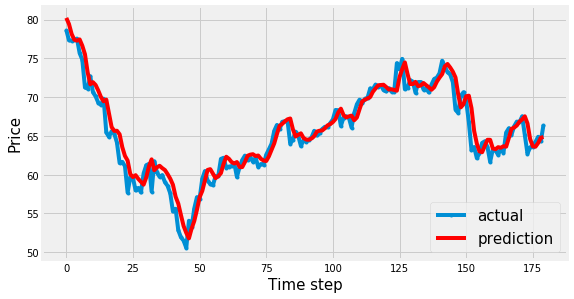

In [17]:
ax=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(ax, ytest[0][:180], marker='.', label="actual")
plt.plot(ax, prediction[:,0][:180], 'r', label="prediction")
plt.tight_layout()
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();